# Task 1

In [1]:
import numpy as np
import pandas as pd
import time
from time import sleep
from time import *
from time import time
import requests
from requests import get  
import nltk
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wrt
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import string
from bs4 import BeautifulSoup as soup
import random
from random import randint
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

# Performing Crawler for search engine 

In [11]:

url_portal = 'https://pureportal.coventry.ac.uk/en/organisations/coventry-university/persons/'
response_uni = get(url_portal)
html_soup = soup(response_uni.text, 'html.parser')
parsed_links = []


In [12]:
for h3_heading_tag in html_soup.find_all('h3', class_='title'):
    html_tag_a = h3_heading_tag.find('a')
    link = html_tag_a['href']
    parsed_links.append(link)

In [13]:
parsed_links = parsed_links[:10]

In [15]:
parsed_links 

['https://pureportal.coventry.ac.uk/en/persons/aliano-abbasi',
 'https://pureportal.coventry.ac.uk/en/persons/sally-abbott',
 'https://pureportal.coventry.ac.uk/en/persons/mohamed-abdelshafy',
 'https://pureportal.coventry.ac.uk/en/persons/mohamad-nazri-abd-karim',
 'https://pureportal.coventry.ac.uk/en/persons/al-noor-abdullah',
 'https://pureportal.coventry.ac.uk/en/persons/muhammad-abdullah',
 'https://pureportal.coventry.ac.uk/en/persons/abdulgafar-abdulraheem',
 'https://pureportal.coventry.ac.uk/en/persons/rozailin-abdul-rahman',
 'https://pureportal.coventry.ac.uk/en/persons/rakib-abdur',
 'https://pureportal.coventry.ac.uk/en/persons/alfiatunnur-abdurrahman']

In [14]:
pages_url = 'https://pureportal.coventry.ac.uk/en/organisations/coventry-university/persons/?page='
dir_links = []

In [16]:
for page_num in range(1, 10):
    indexurl_page = pages_url + str(page_num)
    response_page = get(indexurl_page)
    html_page = soup(response_page.text, 'html.parser')
    
    title_class = 'title'
    for h3_heading_tag in html_page.find_all("h3", class_=title_class):
        html_tag_a = h3_heading_tag.find('a')
        link = html_tag_a.attrs['href']
        dir_links.append(link)

In [17]:
dir_links

['https://pureportal.coventry.ac.uk/en/persons/olubunmi-ajala',
 'https://pureportal.coventry.ac.uk/en/persons/michael-ajao-olarinoye',
 'https://pureportal.coventry.ac.uk/en/persons/titilope-ajepe-2',
 'https://pureportal.coventry.ac.uk/en/persons/fatai-olanrewaju-ajidagba',
 'https://pureportal.coventry.ac.uk/en/persons/toluwanimi-akaehomen',
 'https://pureportal.coventry.ac.uk/en/persons/nurgul-akhtanova',
 'https://pureportal.coventry.ac.uk/en/persons/khwaja-zia-akhtar',
 'https://pureportal.coventry.ac.uk/en/persons/damilola-akinniyi',
 'https://pureportal.coventry.ac.uk/en/persons/opeoluwa-akinseloyin',
 'https://pureportal.coventry.ac.uk/en/persons/christiana-olajumoke-akintoye',
 'https://pureportal.coventry.ac.uk/en/persons/josiah-akintunde-2',
 'https://pureportal.coventry.ac.uk/en/persons/sule-akkoyunlu',
 'https://pureportal.coventry.ac.uk/en/persons/george-akomas',
 'https://pureportal.coventry.ac.uk/en/persons/ebenezer-akore-yeboah',
 'https://pureportal.coventry.ac.uk/en

In [18]:
dir_links = dir_links[:10]
parsed_links += dir_links
parsed_links

['https://pureportal.coventry.ac.uk/en/persons/aliano-abbasi',
 'https://pureportal.coventry.ac.uk/en/persons/sally-abbott',
 'https://pureportal.coventry.ac.uk/en/persons/mohamed-abdelshafy',
 'https://pureportal.coventry.ac.uk/en/persons/mohamad-nazri-abd-karim',
 'https://pureportal.coventry.ac.uk/en/persons/al-noor-abdullah',
 'https://pureportal.coventry.ac.uk/en/persons/muhammad-abdullah',
 'https://pureportal.coventry.ac.uk/en/persons/abdulgafar-abdulraheem',
 'https://pureportal.coventry.ac.uk/en/persons/rozailin-abdul-rahman',
 'https://pureportal.coventry.ac.uk/en/persons/rakib-abdur',
 'https://pureportal.coventry.ac.uk/en/persons/alfiatunnur-abdurrahman',
 'https://pureportal.coventry.ac.uk/en/persons/olubunmi-ajala',
 'https://pureportal.coventry.ac.uk/en/persons/michael-ajao-olarinoye',
 'https://pureportal.coventry.ac.uk/en/persons/titilope-ajepe-2',
 'https://pureportal.coventry.ac.uk/en/persons/fatai-olanrewaju-ajidagba',
 'https://pureportal.coventry.ac.uk/en/persons/

In [26]:
journalsfiles = []
for url in parsed_links:
    response_journal = get(url)
    html_journal = response_journal.text
    categoryparsing = soup(html_journal, "html.parser")
    for item in categoryparsing.find_all('h3', class_='title'): 
        locationurl = item.find('a')
        locationurl_journal = locationurl['href']
        pub_filesjournal = 'https://pureportal.coventry.ac.uk/en/publications/'
        if pub_filesjournal not in locationurl_journal:
            continue
        journalsfiles.append(locationurl_journal)

In [27]:
journalsfiles

['https://pureportal.coventry.ac.uk/en/publications/adopting-industry-40-technologies-in-citizens-electronic-engageme',
 'https://pureportal.coventry.ac.uk/en/publications/emotional-eating-among-adults-with-healthy-weight-overweight-and-',
 'https://pureportal.coventry.ac.uk/en/publications/is-it-time-to-throw-out-the-weighing-scales-implicit-weight-bias-',
 'https://pureportal.coventry.ac.uk/en/publications/variation-and-outcomes-of-liver-reducing-dietary-regimens-before-',
 'https://pureportal.coventry.ac.uk/en/publications/global-variations-in-preoperative-practices-concerning-patients-s',
 'https://pureportal.coventry.ac.uk/en/publications/managing-idiopathic-intracranial-hypertension-in-pregnancy-practi',
 'https://pureportal.coventry.ac.uk/en/publications/cross-layer-multipath-multichannel-mac-protocol-for-manets',
 'https://pureportal.coventry.ac.uk/en/publications/performance-evaluation-of-receiver-directed-transmission-protocol',
 'https://pureportal.coventry.ac.uk/en/publicat

In [28]:
jnl_titles = []
jnl_authors = []

In [29]:
for journal_url in journalsfiles:
    try:
        response_journal = get(journal_url)
        html_journal = response_journal.text
        soup_journal = soup(html_journal, "html.parser")
        rows_class = 'row'
        rendering_class = 'rendering'
        for item in soup_journal.findAll('div', class_=rows_class):
            div = item.findChild('div', class_=rendering_class)
            title = div.find('h1')
            jnl_titles.append(title.text)
        relations_class = 'relations persons'
        for item in soup_journal.findAll('p', class_=relations_class):
            author = item.findChild('span').text
            jnl_authors.append(author)
    except:
        pass


In [30]:
jnl_authors

['Aliano Abbasi',
 'S. Abbott',
 'S Abbott',
 'Sally Abbott',
 'Sally Abbott',
 'Sally Abbott',
 'Mohamed Abdelshafy',
 'Mohamed Abdelshafy',
 'Mohamed Abdelshafy',
 'Mohamed Abdelshafy',
 'Mohamed Abdelshafy',
 'Mohamad Nazri Abd Karim',
 'Mohamad Nazri Mohamad',
 'Mohamad Nazri Abd Karim',
 'Al-Noor Abdullah',
 'Al-Noor Abdullah',
 'Muhammad Abdullah',
 'Abdur Rakib',
 'Rakib Abdur',
 'Rakib Abdur',
 'Abdur Rakib',
 'Abdur Rakib',
 'Olubunmi Ajala',
 'Olubunmi Ajala',
 'Olubunmi Ajala',
 'Michael Ajao-Olarinoye',
 'D.B. Akinniyi',
 'D.B. Akinniyi',
 'D.B. Akinniyi',
 'D.B. Akinniyi',
 'Damilola Akinniyi']

In [31]:
jnl_titles

['Adopting industry 4.0 technologies in citizens’ electronic-engagement considering sustainability development',
 'Emotional eating among adults with healthy weight, overweight and obesity: a systematic review and meta‐analysis',
 '"Is it time to throw out the weighing scales?" Implicit weight bias among healthcare professionals working in bariatric surgery services and their attitude towards non-weight focused approaches',
 'Variation and outcomes of liver-reducing dietary regimens before bariatric surgery: a national retrospective cohort study',
 'Global variations in preoperative practices concerning patients seeking primary bariatric and metabolic surgery (PACT Study): A survey of 634 bariatric healthcare professionals',
 'Managing idiopathic intracranial hypertension in pregnancy: practical advice',
 'Cross-Layer Multipath Multichannel MAC protocol for MANETs',
 'Performance evaluation of Receiver Directed Transmission protocol with a single transceiver in MANETs',
 'Reliable Mult

In [32]:
data_articles = pd.DataFrame({'Title': jnl_titles, 'Author': jnl_authors, 'Link': journalsfiles})
data_articles['ID'] = list(range(1, len(data_articles) + 1))
data_articles.to_csv('data.csv', index=False)
data_articles = pd.read_csv('data.csv')


In [33]:
data_articles.head()

,Title,Author,Link,ID
0,Adopting industry 4.0 technologies in citizens...,Aliano Abbasi,https://pureportal.coventry.ac.uk/en/publicati...,1
1,Emotional eating among adults with healthy wei...,S. Abbott,https://pureportal.coventry.ac.uk/en/publicati...,2
2,"""Is it time to throw out the weighing scales?""...",S Abbott,https://pureportal.coventry.ac.uk/en/publicati...,3
3,Variation and outcomes of liver-reducing dieta...,Sally Abbott,https://pureportal.coventry.ac.uk/en/publicati...,4
4,Global variations in preoperative practices co...,Sally Abbott,https://pureportal.coventry.ac.uk/en/publicati...,5


In [34]:
data_articles.tail()

,Title,Author,Link,ID
26,Volume change behaviour of a saturated laterit...,D.B. Akinniyi,https://pureportal.coventry.ac.uk/en/publicati...,27
27,Experimental study of hydromechanical behaviou...,D.B. Akinniyi,https://pureportal.coventry.ac.uk/en/publicati...,28
28,Influence of structure on the compression and ...,D.B. Akinniyi,https://pureportal.coventry.ac.uk/en/publicati...,29
29,"Comparisons of weathered lateritic, granitic a...",D.B. Akinniyi,https://pureportal.coventry.ac.uk/en/publicati...,30
30,Bone ash influence on soil consolidation,Damilola Akinniyi,https://pureportal.coventry.ac.uk/en/publicati...,31


In [38]:
data_articles.shape

(31, 4)

In [39]:
data_articles['Author'].value_counts()

Author
Mohamed Abdelshafy         5
D.B. Akinniyi              4
Sally Abbott               3
Abdur Rakib                3
Olubunmi Ajala             3
Mohamad Nazri Abd Karim    2
Al-Noor Abdullah           2
Rakib Abdur                2
Aliano Abbasi              1
S. Abbott                  1
S Abbott                   1
Mohamad Nazri Mohamad      1
Muhammad Abdullah          1
Michael Ajao-Olarinoye     1
Damilola Akinniyi          1
Name: count, dtype: int64

In [40]:
data_articles.iloc[27,:]

Title     Experimental study of hydromechanical behaviou...
Author                                        D.B. Akinniyi
Link      https://pureportal.coventry.ac.uk/en/publicati...
ID                                                       28
Name: 27, dtype: object

In [41]:
data_articles_copy= data_articles.iloc[0,:].copy()

In [42]:
data_articles_copy

Title     Adopting industry 4.0 technologies in citizens...
Author                                        Aliano Abbasi
Link      https://pureportal.coventry.ac.uk/en/publicati...
ID                                                        1
Name: 0, dtype: object

# 2. Creating Indexer for search engine

In [44]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


True

In [45]:
def clean_article(lowercase_text):
    lowercase_text = lowercase_text.lower()
    lowercase_text = re.sub(r'[^\w\s]', '', lowercase_text)
    return lowercase_text

In [46]:
def get_wordnet_pos(word):
    lemmatizer = pos_tag([word])[0][1][0].upper()
    word_vocab = {tag[0]: tag[1] for tag in [('J', wrt.ADJ), ('N', wrt.NOUN), ('V', wrt.VERB), ('R', wrt.ADV)]}
    return word_vocab.get(lemmatizer, wrt.NOUN)

In [48]:
test_string = "Testing: {}\n Code: {}\n Is: {}\n ON: {}\n".format(
    get_wordnet_pos("Testing"), get_wordnet_pos("Code"), get_wordnet_pos("Is"), get_wordnet_pos("ON")
)
print(test_string)


Testing: v
 Code: n
 Is: n
 ON: n



In [49]:
sw_engish = sw.words('english') 

In [51]:
wnetlr= WordNetLemmatizer()

In [52]:
def wordnet_lemmatization(text):
    tokens = nltk.word_tokenize(text)
    lemmatized_text = ""
    for token in tokens:
        if token not in sw_engish:
            lemmatized_text += wnetlr.lemmatize(token, get_wordnet_pos(token)) + " "
    return lemmatized_text


In [54]:
wordnet_lemmatization(text = data_articles_copy.Title)

'Adopting industry 4.0 technology citizen ’ electronic-engagement consider sustainability development '

In [55]:
def clean_text(text):
    lowercase_text = text.lower() 
    lowercase_text = lowercase_text.translate(str.maketrans('', '', string.punctuation)) 
    lowercase_text = wordnet_lemmatization(lowercase_text)
    return lowercase_text


In [56]:
%time clean_text(data_articles_copy.Title)

Wall time: 7.01 ms


'adopt industry 40 technology citizen ’ electronicengagement consider sustainability development '

In [57]:
cleanversion_data_articles = data_articles.copy()

In [60]:
def process_articles_data(clean_data):
    clean_data['Author'] = clean_data['Author'].apply(clean_text)
    clean_data['Title'] = clean_data['Title'].apply(clean_text)
    clean_data['Text'] = clean_data['Author'] + " " + clean_data['Title']
    clean_data = clean_data.drop(["Author", "Title", "Link"], axis=1)
    return clean_data

cleanversion_data_articles = process_articles_data(cleanversion_data_articles)



In [61]:
cleanversion_data_articles

,ID,Text
0,1,aliano abbasi adopt industry 40 technology ci...
1,2,abbott emotional eat among adult healthy weig...
2,3,abbott time throw weigh scale implicit weight...
3,4,sally abbott variation outcome liverreducing ...
4,5,sally abbott global variation preoperative pr...
5,6,sally abbott manage idiopathic intracranial h...
6,7,mohamed abdelshafy crosslayer multipath multi...
7,8,mohamed abdelshafy performance evaluation rec...
8,9,mohamed abdelshafy reliable multipath multich...
9,10,mohamed abdelshafy resist blackhole attack ma...


In [63]:
cleanversion_data_articles.shape

(31, 2)

In [64]:
def convert_articles_data(clean_data):
    clean_data = clean_data.copy()
    clean_data['Author'] = clean_data['Author'].apply(clean_text)
    clean_data['Title'] = clean_data['Title'].apply(clean_text)
    clean_data['Text'] = clean_data['Author'] + " " + clean_data['Title']
    clean_data = clean_data.drop(["Author", "Title", "Link"], axis=1)
    return clean_data



In [65]:
data_arc_vocab = cleanversion_data_articles.iloc[0,:].copy() 
print(data_arc_vocab)
prec = {}

ID                                                      1
Text    aliano abbasi  adopt industry 40 technology ci...
Name: 0, dtype: object


In [70]:
def index_articles(data_arc_vocab, index_arc):
    vocabula_wordarticle = data_arc_vocab.Text.split()
    arcid = data_arc_vocab.ID
    for word in vocabula_wordarticle:
        if word in index_arc.keys():
            if arcid not in index_arc[word]:
                index_arc[word].append(arcid)
        else:
            index_arc[word] = [arcid]
    return index_arc



In [72]:
indexed_articles = index_articles(data_arc_vocab, index_arc={})
indexed_articles

{'aliano': [1],
 'abbasi': [1],
 'adopt': [1],
 'industry': [1],
 '40': [1],
 'technology': [1],
 'citizen': [1],
 '’': [1],
 'electronicengagement': [1],
 'consider': [1],
 'sustainability': [1],
 'development': [1]}

In [73]:
def index_articles_data(reportdata, index_arc):
    for i in range(len(reportdata)):
        data_articles_copy = reportdata.iloc[i, :]
        index_arc = index_articles(data_articles_copy, index_arc=index_arc)
    return index_arc




In [74]:
cleanversion_data_articles

,ID,Text
0,1,aliano abbasi adopt industry 40 technology ci...
1,2,abbott emotional eat among adult healthy weig...
2,3,abbott time throw weigh scale implicit weight...
3,4,sally abbott variation outcome liverreducing ...
4,5,sally abbott global variation preoperative pr...
5,6,sally abbott manage idiopathic intracranial h...
6,7,mohamed abdelshafy crosslayer multipath multi...
7,8,mohamed abdelshafy performance evaluation rec...
8,9,mohamed abdelshafy reliable multipath multich...
9,10,mohamed abdelshafy resist blackhole attack ma...


In [76]:
article_indexed = index_articles_data(cleanversion_data_articles, index_arc={})
len(article_indexed)


234

In [77]:
article_indexed

{'aliano': [1],
 'abbasi': [1],
 'adopt': [1],
 'industry': [1],
 '40': [1],
 'technology': [1, 23],
 'citizen': [1],
 '’': [1, 12],
 'electronicengagement': [1],
 'consider': [1],
 'sustainability': [1],
 'development': [1],
 'abbott': [2, 3, 4, 5, 6],
 'emotional': [2],
 'eat': [2],
 'among': [2, 3],
 'adult': [2],
 'healthy': [2],
 'weight': [2, 3],
 'overweight': [2],
 'obesity': [2],
 'systematic': [2],
 'review': [2],
 'meta‐analysis': [2],
 'time': [3],
 'throw': [3],
 'weigh': [3],
 'scale': [3],
 'implicit': [3],
 'bias': [3],
 'healthcare': [3, 5],
 'professional': [3, 5],
 'work': [3],
 'bariatric': [3, 4, 5],
 'surgery': [3, 4, 5],
 'service': [3],
 'attitude': [3],
 'towards': [3],
 'nonweight': [3],
 'focus': [3],
 'approach': [3, 18, 21, 22],
 'sally': [4, 5, 6],
 'variation': [4, 5],
 'outcome': [4],
 'liverreducing': [4],
 'dietary': [4],
 'regimen': [4],
 'national': [4],
 'retrospective': [4],
 'cohort': [4],
 'study': [4, 5, 15, 16, 28],
 'global': [5],
 'preoperati

In [79]:
def build_article_index(reportdata, index_arc):
    combined_data = convert_articles_data(reportdata)
    index_arc = index_articles_data(combined_data, index_arc=index_arc)
    return index_arc

indexed_articles = build_article_index(reportdata=data_articles, index_arc={})

In [80]:
indexed_articles

{'aliano': [1],
 'abbasi': [1],
 'adopt': [1],
 'industry': [1],
 '40': [1],
 'technology': [1, 23],
 'citizen': [1],
 '’': [1, 12],
 'electronicengagement': [1],
 'consider': [1],
 'sustainability': [1],
 'development': [1],
 'abbott': [2, 3, 4, 5, 6],
 'emotional': [2],
 'eat': [2],
 'among': [2, 3],
 'adult': [2],
 'healthy': [2],
 'weight': [2, 3],
 'overweight': [2],
 'obesity': [2],
 'systematic': [2],
 'review': [2],
 'meta‐analysis': [2],
 'time': [3],
 'throw': [3],
 'weigh': [3],
 'scale': [3],
 'implicit': [3],
 'bias': [3],
 'healthcare': [3, 5],
 'professional': [3, 5],
 'work': [3],
 'bariatric': [3, 4, 5],
 'surgery': [3, 4, 5],
 'service': [3],
 'attitude': [3],
 'towards': [3],
 'nonweight': [3],
 'focus': [3],
 'approach': [3, 18, 21, 22],
 'sally': [4, 5, 6],
 'variation': [4, 5],
 'outcome': [4],
 'liverreducing': [4],
 'dietary': [4],
 'regimen': [4],
 'national': [4],
 'retrospective': [4],
 'cohort': [4],
 'study': [4, 5, 15, 16, 28],
 'global': [5],
 'preoperati

# 3. Creating Query processing for search engine

In [88]:
def structure_cleaning(lowering_article):
    lowering_article = lowering_article.lower()
    lowering_article = re.sub(r'[^\w\s]', '', lowering_article)
    stopwords_eng = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    cleaned_article = [lemmatizer.lemmatize(word) for word in lowering_article.split() if word not in stopwords_eng]
    return ' '.join(cleaned_article)

In [92]:
import re
from nltk.corpus import stopwords


In [94]:
query = 'clay'
print(f"Performing a search with the query: {query}")

normalized_query = structure_cleaning(query)
print(f"Normalized query: {normalized_query}")

Performing a search with the query: clay
Normalized query: clay


In [95]:
query_terms = normalized_query.split()



In [96]:
def process_query(query):
    processed_query = structure_cleaning(query)
    return processed_query.split()

retrieved_data = []


In [98]:
for term in query_terms:
    if term in indexed_articles.keys():
        retrieved_data.append(indexed_articles[term])



In [99]:
def intersect_lists(list_data):
    intersected_data = list(set.intersection(*map(set, list_data)))
    intersected_data.sort()
    return intersected_data

result_data = intersect_lists(retrieved_data)
print(result_data)



[27, 28, 29]


In [100]:
def search_articles(query, article_index=indexed_articles):
    processed_query = process_query(query)
    retrieved_data = []
    for term in processed_query:
        if term in article_index.keys():
            retrieved_data.append(article_index[term])
    if len(retrieved_data) > 0:
        search_results = intersect_lists(retrieved_data)
    else:
        search_results = 'No details found'
    return search_results



#  Search Article

In [123]:

search_keyword = input('Enter the search keyword for articles: ')
search_results = search_articles(search_keyword, indexed_articles)
print(search_results)

Enter the search keyword for articles: migration
[9]


In [107]:
print(data_articles.columns)


Index(['Title', 'Author', 'Link', 'ID'], dtype='object')


In [108]:
filtered_articles = data_articles.drop(['Title'], axis=1).copy()
filtered_articles.head()

,Author,Link,ID
0,Aliano Abbasi,https://pureportal.coventry.ac.uk/en/publicati...,1
1,S. Abbott,https://pureportal.coventry.ac.uk/en/publicati...,2
2,S Abbott,https://pureportal.coventry.ac.uk/en/publicati...,3
3,Sally Abbott,https://pureportal.coventry.ac.uk/en/publicati...,4
4,Sally Abbott,https://pureportal.coventry.ac.uk/en/publicati...,5


In [124]:
def id_articledata_cleaning(acquired_ids, datareport):
    return datareport[datareport['ID'].isin(acquired_ids)].reset_index(drop=True)
ultimate_meta = id_articledata_cleaning(search_results, filtered_articles)
ultimate_meta.head()


,Author,Link,ID
0,Mohamed Abdelshafy,https://pureportal.coventry.ac.uk/en/publicati...,9


# Task 2

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Load the dataset

In [128]:
dataset_path = r'C:\Users\User\bbc-text.csv'
df = pd.read_csv(dataset_path)

In [129]:
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [131]:
df['preprocessed_text'] = df['text'].apply(preprocess_text)

In [132]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['preprocessed_text'])



In [133]:
# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_svd)



# Visualize the clusters using t-SNE

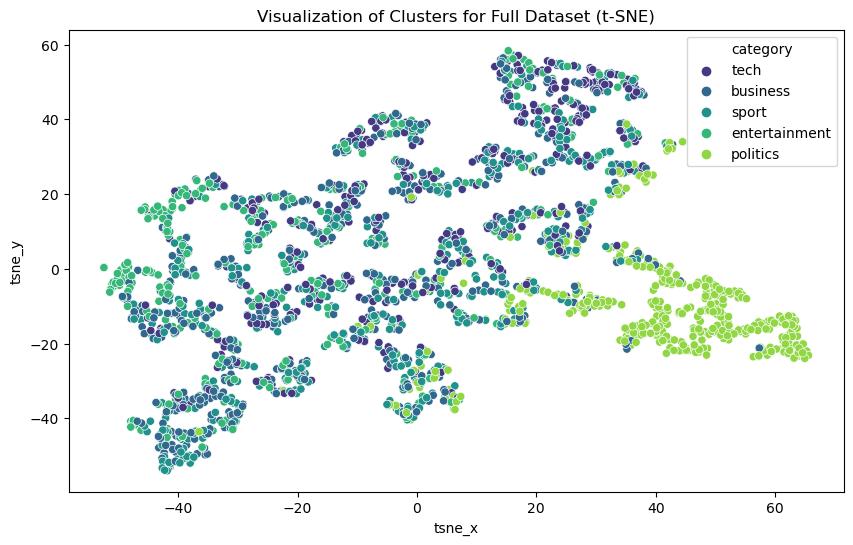

In [134]:
df['tsne_x'] = X_tsne[:, 0]
df['tsne_y'] = X_tsne[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='category', palette='viridis')
plt.title('Visualizing the data of Clusters for BBC Dataset (t-SNE)')
plt.show()



# Word Clouds

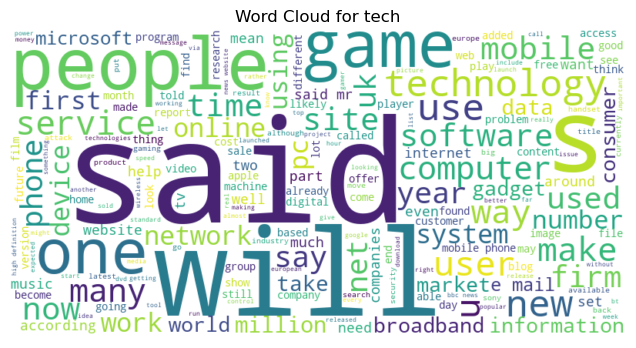

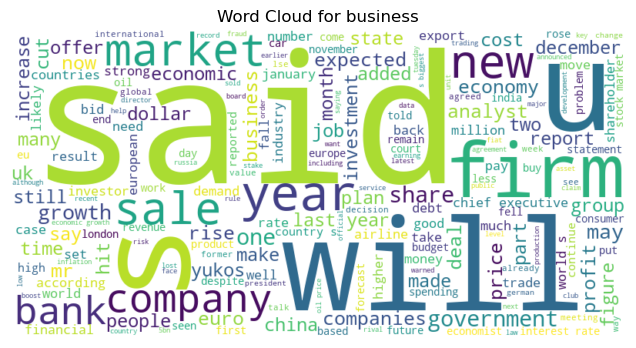

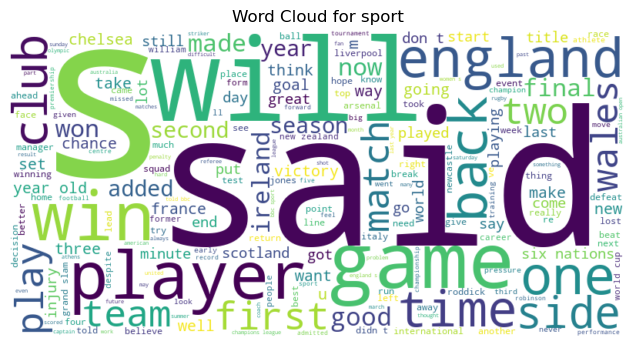

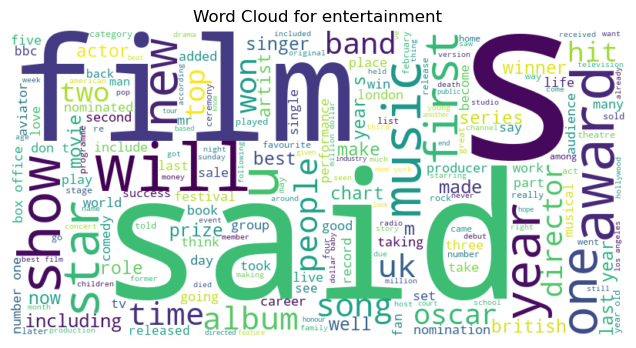

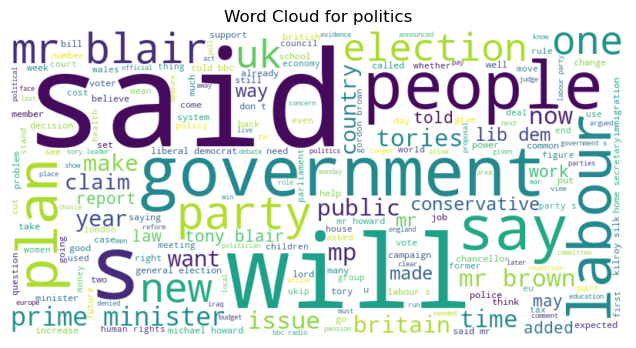

In [137]:
from wordcloud import WordCloud
categories = df['category'].unique()
for category in categories:
    category_text = df[df['category'] == category]['preprocessed_text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {category}')
    plt.axis('off')
    plt.show()



# Bar Plott

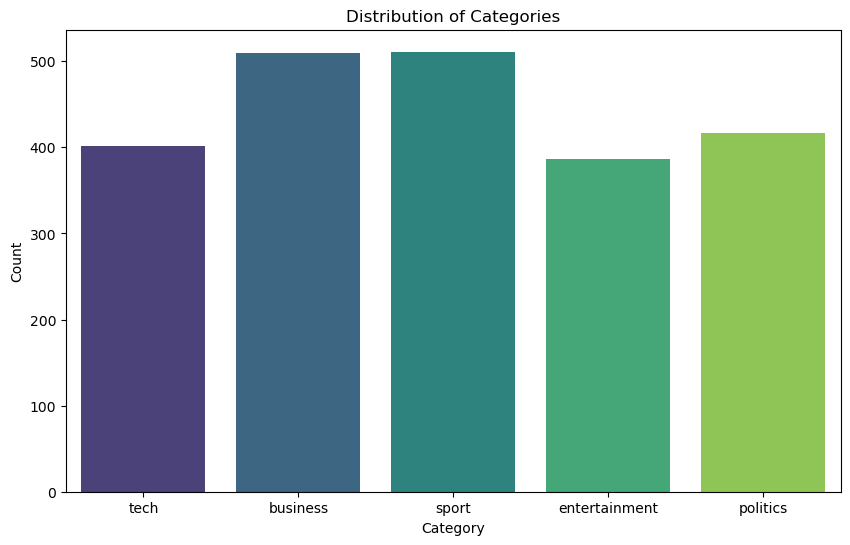

In [136]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


# Split the dataset into training and test sets

In [138]:

train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)



# TF-IDF Vectorization

In [139]:

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['preprocessed_text'])
y_train = train_df['category']
X_test = vectorizer.transform(test_df['preprocessed_text'])
y_test = test_df['category']

In [141]:
# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

tsne = TSNE(n_components=2)
X_train_tsne = tsne.fit_transform(X_train_svd)
X_test_tsne = tsne.fit_transform(X_test_svd)


# Train the Support Vector Classifier

In [142]:

clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [143]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)



Accuracy: 0.9797752808988764


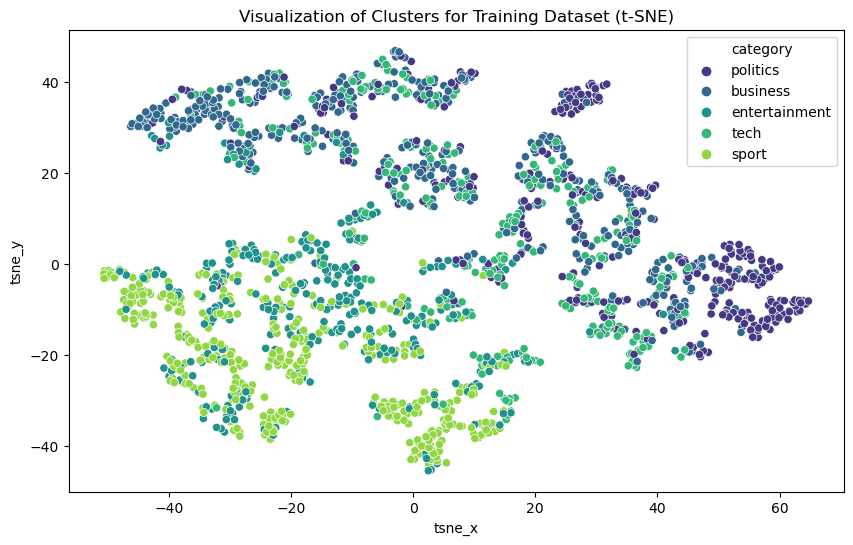

In [144]:
# Visualize the clusters using t-SNE
train_df['tsne_x'] = X_train_tsne[:, 0]
train_df['tsne_y'] = X_train_tsne[:, 1]
test_df['tsne_x'] = X_test_tsne[:, 0]
test_df['tsne_y'] = X_test_tsne[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='tsne_x', y='tsne_y', hue='category', palette='viridis')
plt.title('Visualizing the data of Clusters for Training Dataset after splitting  (t-SNE)')
plt.show()



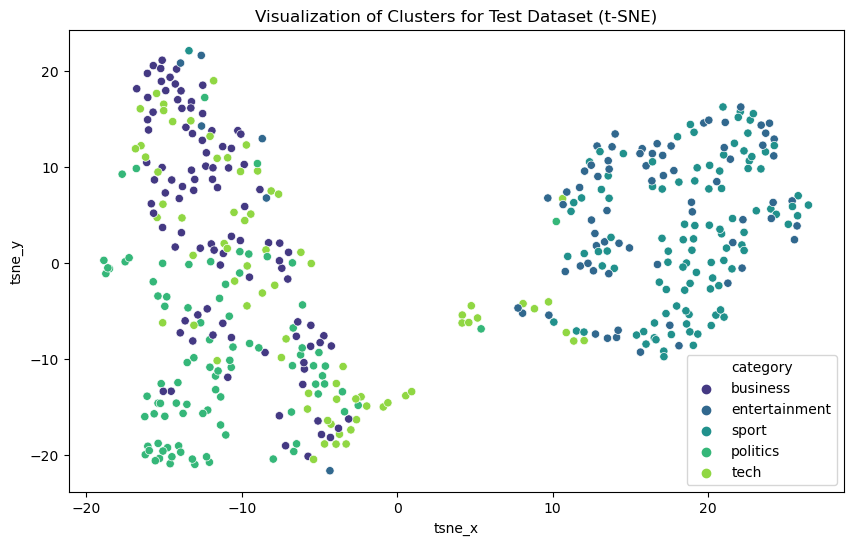

In [145]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=test_df, x='tsne_x', y='tsne_y', hue='category', palette='viridis')
plt.title('Visualizing the data of Clusters for Test Dataset after splitting (t-SNE)')
plt.show()